In [1]:
import torch
import os
import sys
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
sys.path.append(r"E:\Projects\Deep_Learning\Car_Segmentation\Utils")

from unet_model import UNET
from segmentation_utils import SegmentationDataset, load_checkpoint

In [3]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
model = UNET(in_channels=3, out_channels=5).to(DEVICE)

In [5]:
if os.path.exists("../Model Checkpoints/car_segmentation_checkpoint.pth.tar"):
        load_checkpoint(torch.load("../Model Checkpoints/car_segmentation_checkpoint.pth.tar"), model)
        print("=> Checkpoint Loaded")

=> Loading checkpoint
=> Checkpoint Loaded


In [6]:
ds = SegmentationDataset(dirPath="../Data/car_dataset", imageDir='images/', masksDir='masks/', img_size=512)
car_dataloader = DataLoader(ds, 2, shuffle=True, num_workers=0, pin_memory=False)

In [7]:
def dice_coef(groundtruth_mask, pred_mask):
        if groundtruth_mask.shape != pred_mask.shape:
                print("groundtruth_mask.shape =", groundtruth_mask.shape, "pred_mask.shape = ", pred_mask.shape)
                raise ValueError("Shape mismatch: groundtruth_mask and pred_mask must have to be of the same shape.")
        intersect = np.sum(pred_mask*groundtruth_mask)
        total_sum = np.sum(pred_mask) + np.sum(groundtruth_mask)
        dice = np.mean(2*intersect/total_sum)
        return round(dice, 3) #round up to 3 decimal places

gt =  torch.Size([2, 1, 512, 512])
img =  torch.Size([2, 3, 512, 512])
img new =  torch.Size([3, 512, 512]) torch.Size([512, 512, 3])
torch.Size([2, 5, 512, 512])
out =  torch.Size([2, 1, 512, 512])
mask.shape  = torch.Size([2, 1, 512, 512])


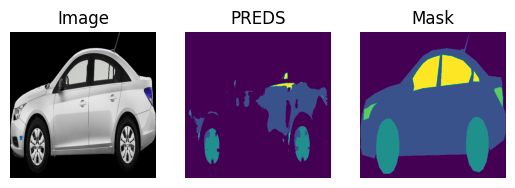

In [8]:
for i in car_dataloader:
    img , gt_mask = i
    print("gt = ",gt_mask.shape)
    
    img = img.to(DEVICE)
    print("img = ", img.shape)
    print("img new = ", img[0].shape, img[0].permute(1,2,0).shape)
    with torch.no_grad():
        out = model(img)
        
    print(out.shape)
    
    probs = torch.nn.functional.softmax(out,dim=1)
    
    out = torch.argmax(probs, dim=1,keepdim=True)
    
    print("out = ", out.shape)
    
    mask = out.detach().cpu()
    
    print("mask.shape  =", mask.shape)
    
    plt.subplot(1,3,1)
    plt.imshow(img[0].permute(1,2,0).cpu())
    plt.title('Image')
    plt.axis(False)
    plt.subplot(1,3,2)
    plt.title('PREDS')
    plt.imshow(mask[0].permute(1,2,0).cpu())
    plt.axis(False)
    plt.subplot(1,3,3)
    plt.title('Mask')
    plt.axis(False)
    plt.imshow(gt_mask[0].permute(1,2,0))
    plt.show()
    break